In [80]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [81]:
# read data
#path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
path="Data-Collisions.csv"
df = pd.read_csv(path)

C:\Users\Wuyue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [82]:
# use colums that doesnt have dominating categorial objects
acc_df=df[['ADDRTYPE','ROADCOND','WEATHER','LIGHTCOND','SEVERITYCODE']]
acc_df.shape

(194673, 5)

In [83]:
acc_df.dropna()
acc_df.shape

(194673, 5)

In [84]:
# filter out all the unknown rows
acc_df = acc_df[df.ROADCOND != "Unknown"]
acc_df = acc_df[df.WEATHER != "Unknown"]
acc_df = acc_df[df.LIGHTCOND != "Unknown"]
acc_df = acc_df[df.ROADCOND != "Other"]
acc_df = acc_df[df.WEATHER != "Other"]
acc_df = acc_df[df.LIGHTCOND != "Other"]
acc_df.shape

<ipython-input-84-659fad21493d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Unknown"]
<ipython-input-84-659fad21493d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Unknown"]
<ipython-input-84-659fad21493d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.ROADCOND != "Other"]
<ipython-input-84-659fad21493d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Other"]
<ipython-input-84-659fad21493d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Other"]


(175216, 5)

In [85]:
# convert the colums to numeric values to apply machine learning
cleanup_nums = {"ADDRTYPE":{"Block": 0, "Intersection": 1, "Alley": 0},
                "ROADCOND":{"Dry": 1,"Wet": 0,"Ice": 0,"Snow/Slush": 0,"Standing Water": 0,"Sand/Mud/Dirt": 0,"Oil": 0},
                "WEATHER": {"Clear": 1, "Raining": 0, "Overcast": 0, "Snowing": 0,"Fog/Smog/Smoke": 0, 
                            "Sleet/Hail/Freezing Rain": 0, "Blowing Sand/Dirt": 0,"Severe Crosswind": 0,"Partly Cloudy": 0},
                "LIGHTCOND": {"Daylight": 1,"Dark - Street Lights On": 0,"Dusk": 0,"Dawn": 0,"Dark - No Street Lights": 0,
                              "Dark - Street Lights Off": 0,"Dark - Unknown Lighting": 0}}



In [86]:
#To convert the columns to numbers using replace :
acc_df.replace(cleanup_nums, inplace=True)
# since we only have two SEVERITYCODE category, we can convert them into binary code
acc_df["SEVERITYCODE"]=acc_df["SEVERITYCODE"]-1
acc_df.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,1.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,1.0,0
3,0.0,1.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,1


In [87]:
# lets rename the colums so it makes more sense
acc_df.rename(columns={'ADDRTYPE':'Intersection','ROADCOND':'Dry_Road', 'WEATHER':'Clear_Weather','LIGHTCOND':'Daylight','SEVERITYCODE': 'Injure'}, inplace=True)
acc_df.head()

,Intersection,Dry_Road,Clear_Weather,Daylight,Injure
0,1.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,1.0,0
3,0.0,1.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,1


In [88]:
acc_df.shape

(175216, 5)

In [89]:
acc_df.dropna()
acc_df.shape

(175216, 5)

In [90]:
acc_df = acc_df.reset_index()

In [130]:
# import tool needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [131]:
# Test for different combinations
#X=np.array(acc_df[['Intersection']])
#X=np.array(acc_df[['Dry_Road']])
#X=np.array(acc_df[['Clear_Weather']])
#X=np.array(acc_df[['Daylight']])
X=np.array(acc_df[['Intersection','Dry_Road','Clear_Weather','Daylight']])
X = preprocessing.StandardScaler().fit(X).transform(X)
y=np.array(acc_df["Injure"])

# split our dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
X_train=np.nan_to_num(X_train)
y_train=np.nan_to_num(y_train)
X_test=np.nan_to_num(X_test)
y_test=np.nan_to_num(y_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105129, 4) (105129,)
Test set: (70087, 4) (70087,)


#Logistics Regression Results


#X=np.array(acc_df[['Intersection']])
LogLoss: 0.62
Avg F1-score: 0.5439
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044


#X=np.array(acc_df[['Dry_Road']])
LogLoss: 0.63
Avg F1-score: 0.5439
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044


#X=np.array(acc_df[['Clear_Weather']])
LogLoss: 0.63
Avg F1-score: 0.5439
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044


#X=np.array(acc_df[['Daylight']])
LogLoss: 0.63
Avg F1-score: 0.5439
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044


#X=np.array(acc_df[['Intersection','Dry_Road','Clear_Weather','Daylight']])
LogLoss: 0.61
Avg F1-score: 0.5439
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044

In [132]:
# Modeling (Logistic Regression with Scikit-learn)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# predict using our test set
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

# evaluate the model

#Jaccard Index
LogRJaccard = jaccard_score(y_test, yhat)
# F-1 Score
LogRF1 = f1_score(y_test, yhat, average='weighted')
#Log Loss
Logloss = log_loss(y_test, yhat_prob)

print("LogLoss: %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("Jaccard score: %.4f" % LogRJaccard)

from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

LogLoss: 0.62
Avg F1-score: 0.5432
Jaccard score: 0.0000
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     47266
           1       0.00      0.00      0.00     22821

    accuracy                           0.67     70087
   macro avg       0.34      0.50      0.40     70087
weighted avg       0.45      0.67      0.54     70087



C:\Users\Wuyue\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    0 22821]
 [    0 47266]]


Confusion matrix, without normalization
[[    0 22821]
 [    0 47266]]


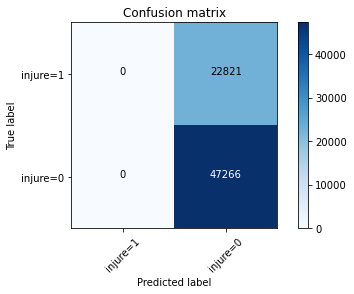

In [135]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injure=1','injure=0'],normalize= False,  title='Confusion matrix')

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


Train set Accuracy:  0.6587525801634183
Test set Accuracy:  0.6579964900766191
Jaccard score: 0.1718
              precision    recall  f1-score   support

           0       0.70      0.87      0.77     47266
           1       0.45      0.22      0.29     22821

    accuracy                           0.66     70087
   macro avg       0.57      0.54      0.53     70087
weighted avg       0.62      0.66      0.62     70087

Confusion matrix, without normalization
[[ 4973 17848]
 [ 6122 41144]]


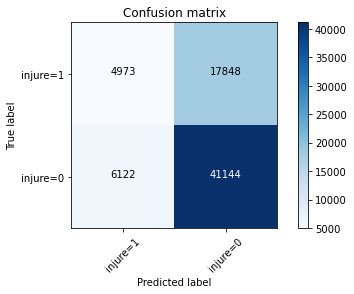

In [136]:
k=18
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
LogRJaccard = jaccard_score(y_test, yhat)
print("Jaccard score: %.4f" % LogRJaccard)
print (classification_report(y_test, yhat))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injure=1','injure=0'],normalize= False,  title='Confusion matrix')

In [119]:
# now we try decision tree

#modeling
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

# train the model
drugTree.fit(X_train,y_train)

# make predictions
predTree = drugTree.predict(X_test)

# evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print (classification_report(y_test, predTree))

DecisionTrees's Accuracy:  0.6748658828900811
              precision    recall  f1-score   support

           0       0.67      1.00      0.81     23650
           1       0.00      0.00      0.00     11394

    accuracy                           0.67     35044
   macro avg       0.34      0.50      0.40     35044
weighted avg       0.46      0.67      0.54     35044



C:\Users\Wuyue\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat2 = clf.predict(X_test)

In [129]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.5432
Jaccard score: 0.0000
